## <center>Exploring Student Data
Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?

In this project, you’ll explore and summarize some student data in order to answer these questions.

## About Data

The provided data (students.csv) includes the following variables/features:

- **address:** the location of the student’s home ('U' for urban and 'R' for rural)
- **absences:** the number of times the student was absent during the school year
- **Mjob:** the student’s mother’s job industry
- **Fjob:** the student’s father’s job industry
- **math_grade:** the student’s final grade in math, ranging from 0 to 20

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

##### Exercise 1
Load the data and inspect the first few rows of data.

In [3]:
students = pd.read_csv("students.csv")
students.head()

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


##### Exercise 2
Use the pandas ``.describe()`` method to print out summary statistics for all five features in the dataset. <br>
Inspect the output. Do more students live in urban or rural locations?

In [5]:
students.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absences,395.0,NaN,NaN,NaN,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_grade,395.0,NaN,NaN,NaN,10.41519,4.581443,0.0,8.0,11.0,14.0,20.0


##### Exercise 3
Let's start by trying to summarize the `math_grade` column. Calculate and print the mean value of ``math_grade``.

In [12]:
avg_math_grade = round(students["math_grade"].mean(), 2)
print(f"The average math grade is {avg_math_grade}.")

The average math grade is 10.42.


##### Exercise 4
Calculate and print the median value of `math_grade`. Compare this value to the mean. Is it smaller? larger?

In [14]:
median_math_grade = students["math_grade"].median()
print(f"The median math grade is {median_math_grade}.")

The median math grade is 11.0.


In [15]:
if avg_math_grade > median_math_grade:
    print("Average math grade is larger than median math grade.")
else:
    print("Median math grade is larger than average math grade.")

Median math grade is larger than average math grade.


##### Exercise 5
Calculate and print the mode of the `math_grade` column. What is the most common grade earned by students in this dataset? 
<br>How different is this number from the mean and median?

In [29]:
mode_math_grade = students["math_grade"].mode().values[0]

print(f"The most common grade earned by students is {mode_math_grade}.")

if mode_math_grade > median_math_grade and mode_math_grade > avg_math_grade:
    print("The mode is larger than median and average.")
elif mode_math_grade > median_math_grade and mode_math_grade < median_math_grade:
    print("The mode is larger than median but smaller than median.")
elif mode_math_grade < median_math_grade and mode_math_grade < avg_math_grade:
    print("The mode is smaller than median and average.")
elif mode_math_grade < median_math_grade and mode_math_grade > avg_math_grade:
    print("The mode is smaller than median but larger than average.")

The most common grade earned by students is 10.
The mode is smaller than median and average.


##### Exercise 6
Summarize the spread of student grades. Calculate and print the range of the `math_grade` column.

In [32]:
range_math_grade = students["math_grade"].max() - students["math_grade"].min()
print(f"The range of the math grade is {range_math_grade}.")

The range of the math grade is 20.


##### Exercise 7
Calculate and print the standard deviation of the `math_grade` column.<br>
What does this number tell you about how much math grades vary?

In [33]:
std_math_grade = students["math_grade"].std()
std_math_grade

4.5814426109978434

In [39]:
print(f"About two thirds of students are earning a grade between \
{round(avg_math_grade - std_math_grade, 2)} and {round(avg_math_grade + std_math_grade, 2)}.")

About two thirds of students are earning a grade between 5.84 and 15.0.


##### Exercise 8
Calculate the mean absolute deviation of the `math_grade` column. This is the mean difference between each students’s score and the average score.

In [43]:
mad_math_grade = round(students["math_grade"].mad(), 2)
print(f"The mean difference between each student's score and average score is {mad_math_grade}.")

The mean difference between each student's score and average score is 3.43.


##### Exercise 9
Use the seaborn ``histplot()`` function to create a histogram of `math_grade`.

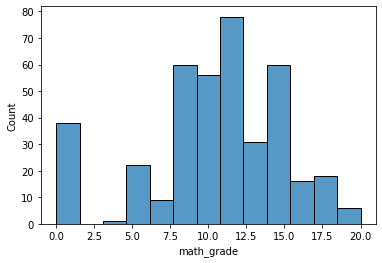

<Figure size 432x288 with 0 Axes>

In [45]:
sns.histplot(data=students, x="math_grade")
plt.show()
plt.clf()

##### Exercise 10
Another way to visualize the distribution of a quantitative variable is using a box plot.<br>
Use the seaborn ``boxplot()`` function to create a boxplot of ``math_grade``.

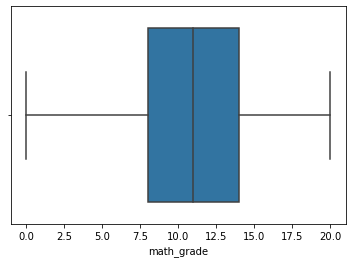

<Figure size 432x288 with 0 Axes>

In [47]:
sns.boxplot(data=students, x="math_grade")
plt.show()
plt.clf()

##### Exercise 11

The `Mjob` column in the dataset contains information about what the students mothers do as a profession.<br>
Summarize the `Mjob` column by printing the number of students who have mothers with each job type.<br>
Which value of Mjob is most common?

In [60]:
students["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [82]:
print("The most common job is other and 141 of mothers do this job.")

The most common job is other and 141 of mothers do this job.


##### Exercise 12
Calculate and print the proportion of students who have mothers with each job type.<br>
What proportion of students have mothers who work in `health`?

In [131]:
students["Mjob"].value_counts(normalize=True)

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64

In [116]:
health = pd.DataFrame(students["Mjob"].value_counts(normalize=True))\
.reset_index().rename(columns ={"index": "Mjob", "Mjob": "Percentage"})[4:]

In [129]:
perc = str(round((health["Percentage"]* 100).values[0], 2))

In [132]:
print(f"{perc}% of students have mothers who work in health.")

8.61% of students have mothers who work in health.


##### Exercise 13
Now that we’ve used summary statistics to understand the relative frequencies of different mothers’ jobs, let’s visualize the same information with a bar chart. <br>
Use the seaborn ``countplot()`` function to create a bar chart of the ``Mjob`` variable.

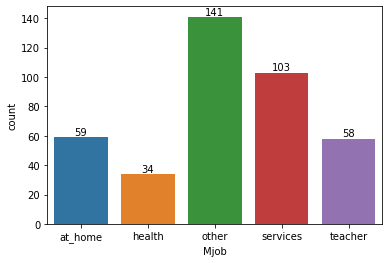

<Figure size 432x288 with 0 Axes>

In [140]:
ax = sns.countplot(data=students, x="Mjob")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()
plt.clf()

##### Exercise 14
We can also visualize the same information using a pie chart. Create a pie chart of the `Mjob` column.

In [145]:
students["Mjob"].value_counts().index

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')

In [141]:
students["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

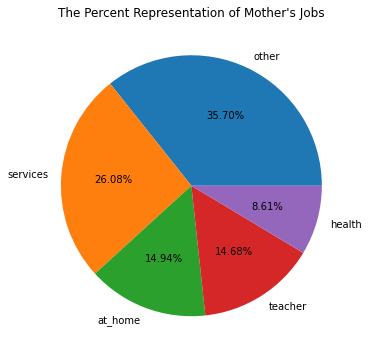

<Figure size 432x288 with 0 Axes>

In [152]:
plt.figure(figsize=(6, 6))
plt.pie(x=students["Mjob"].value_counts(), labels=students["Mjob"].value_counts().index, autopct="%.2f%%")
plt.title("The Percent Representation of Mother's Jobs")

plt.show()
plt.clf()